---
### **Traffic Forecasting using IoT Sensor Data**
---
#### **Context**

You are working with the government to transform your city into a smart city. The vision is to convert it into a digital and intelligent city to improve the efficiency of services for the citizens. One of the problems faced by the government is traffic. You are a data scientist working to manage the traffic of the city better and to provide input on infrastructure planning for the future.

The government wants to implement a robust traffic system for the city by being prepared for traffic peaks. They want to understand the traffic patterns of the four junctions of the city. Traffic patterns on holidays, as well as on various other occasions during the year, differ from normal working days. This is important to take into account for your forecasting.

#### **Content**

To predict traffic patterns in each of these four junctions for the next 4 months.

The sensors on each of these junctions were collecting data at different times, hence you will see traffic data from different time periods. To add to the complexity, some of the junctions have provided limited or sparse data requiring thoughtfulness when creating future projections. Depending upon the historical data of 20 months, the government is looking to you to deliver accurate traffic projections for the coming four months. Your algorithm will become the foundation of a larger transformation to make your city smart and intelligent.

Dataset Link:
https://www.kaggle.com/datasets/vetrirah/ml-iot/data

---

#### **Variable Information**

**ID**       : Unique IDs for each reading

**DateTime** : Date and Time in hourly interval

**Junction** : Junction Number (Observation collected)

**Vehicles** : Number of Vehicles (Target)


---

#### **Importing Libraries**

---

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

---

#### **Loading Dataset**

---

In [69]:
# df_train = pd.read_csv("/content/drive/MyDrive/train_ML_IOT.csv")
df_train = pd.read_csv("train_ML_IOT.csv")
df_train

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [70]:
# df_test = pd.read_csv("/content/drive/MyDrive/test_ML_IOT.csv")
df_test = pd.read_csv("test_ML_IOT.csv")
df_test

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041
...,...,...,...
11803,2017-10-31 19:00:00,4,20171031194
11804,2017-10-31 20:00:00,4,20171031204
11805,2017-10-31 21:00:00,4,20171031214
11806,2017-10-31 22:00:00,4,20171031224


---

#### **Exploratory Data Analysis**

---

In [71]:
# What is the shape of the training data? i.e. Number of Rows and Columns

df_train.shape

(48120, 4)

In [72]:
# What is the shape of the test data? i.e. Number of Rows and Columns

df_test.shape

(11808, 3)

In [73]:
# How many total values in each columns?
# How many null values?
# What is the data types of each column?

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [74]:
# How many unique values are available in each column?

df_train.apply(lambda x: x.nunique())

DateTime    14592
Junction        4
Vehicles      141
ID          48120
dtype: int64

In [75]:
# Does ID column adding any value to the data? No
# So, we can drop the ID column

df_train.drop(columns=['ID'], inplace=True)
df_train

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


In [76]:
# Does ID column adding any value to the data? No

df_test.drop(columns=['ID'], inplace=True)
df_test

,DateTime,Junction
0,2017-07-01 00:00:00,1
1,2017-07-01 01:00:00,1
2,2017-07-01 02:00:00,1
3,2017-07-01 03:00:00,1
4,2017-07-01 04:00:00,1
...,...,...
11803,2017-10-31 19:00:00,4
11804,2017-10-31 20:00:00,4
11805,2017-10-31 21:00:00,4
11806,2017-10-31 22:00:00,4


In [77]:
# Do we need to change the data type for DateTime column? Yes

df_train['DateTime'] = pd.to_datetime(df_train['DateTime'])
df_train.dtypes

DateTime    datetime64[ns]
Junction             int64
Vehicles             int64
dtype: object

In [78]:
# Do we need to change the data type for DateTime column in test data? Yes

df_test['DateTime'] = pd.to_datetime(df_test['DateTime'])
df_test.dtypes

DateTime    datetime64[ns]
Junction             int64
dtype: object

---

#### **Feature Generation and Engineering**

---

In [79]:
# Do we need to create any new columns from DateTime column? Yes
# Which columns can be created? Year, Month, DayOfWeek, Day, Date, Hour

df_train['Year'] = df_train['DateTime'].dt.year
df_train['Month'] = df_train['DateTime'].dt.month
df_train['WeekOfYear'] = df_train['DateTime'].dt.isocalendar().week
df_train['DayOfWeek'] = df_train['DateTime'].dt.dayofweek
df_train['DayOfMonth'] = df_train['DateTime'].dt.day
df_train['Hour'] = df_train['DateTime'].dt.hour

df_train

,DateTime,Junction,Vehicles,Year,Month,WeekOfYear,DayOfWeek,DayOfMonth,Hour
0,2015-11-01 00:00:00,1,15,2015,11,44,6,1,0
1,2015-11-01 01:00:00,1,13,2015,11,44,6,1,1
2,2015-11-01 02:00:00,1,10,2015,11,44,6,1,2
3,2015-11-01 03:00:00,1,7,2015,11,44,6,1,3
4,2015-11-01 04:00:00,1,9,2015,11,44,6,1,4
...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,2017,6,26,4,30,19
48116,2017-06-30 20:00:00,4,30,2017,6,26,4,30,20
48117,2017-06-30 21:00:00,4,16,2017,6,26,4,30,21
48118,2017-06-30 22:00:00,4,22,2017,6,26,4,30,22


In [80]:
# Do we need to create any new columns from DateTime column in test data? Yes

df_test['Year'] = df_test['DateTime'].dt.year
df_test['Month'] = df_test['DateTime'].dt.month
df_test['WeekOfYear'] = df_test['DateTime'].dt.isocalendar().week
df_test['DayOfWeek'] = df_test['DateTime'].dt.dayofweek
df_test['DayOfMonth'] = df_test['DateTime'].dt.day
df_test['Hour'] = df_test['DateTime'].dt.hour

df_test

,DateTime,Junction,Year,Month,WeekOfYear,DayOfWeek,DayOfMonth,Hour
0,2017-07-01 00:00:00,1,2017,7,26,5,1,0
1,2017-07-01 01:00:00,1,2017,7,26,5,1,1
2,2017-07-01 02:00:00,1,2017,7,26,5,1,2
3,2017-07-01 03:00:00,1,2017,7,26,5,1,3
4,2017-07-01 04:00:00,1,2017,7,26,5,1,4
...,...,...,...,...,...,...,...,...
11803,2017-10-31 19:00:00,4,2017,10,44,1,31,19
11804,2017-10-31 20:00:00,4,2017,10,44,1,31,20
11805,2017-10-31 21:00:00,4,2017,10,44,1,31,21
11806,2017-10-31 22:00:00,4,2017,10,44,1,31,22


In [81]:
# Do we have to consider any holiday data? Yes. Hum of traffic is different on working days Vs. holidays
# Which holiday data can be considered? Let's consider only Sunday as holiday

df_train['IsHoliday'] = np.where(df_train['DayOfWeek'] == 6, 1, 0)
df_train

,DateTime,Junction,Vehicles,Year,Month,WeekOfYear,DayOfWeek,DayOfMonth,Hour,IsHoliday
0,2015-11-01 00:00:00,1,15,2015,11,44,6,1,0,1
1,2015-11-01 01:00:00,1,13,2015,11,44,6,1,1,1
2,2015-11-01 02:00:00,1,10,2015,11,44,6,1,2,1
3,2015-11-01 03:00:00,1,7,2015,11,44,6,1,3,1
4,2015-11-01 04:00:00,1,9,2015,11,44,6,1,4,1
...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,2017,6,26,4,30,19,0
48116,2017-06-30 20:00:00,4,30,2017,6,26,4,30,20,0
48117,2017-06-30 21:00:00,4,16,2017,6,26,4,30,21,0
48118,2017-06-30 22:00:00,4,22,2017,6,26,4,30,22,0


In [82]:
# Do we have to consider any holiday data in test data? Yes

df_test['IsHoliday'] = np.where(df_test['DayOfWeek'] == 6, 1, 0)
df_test

,DateTime,Junction,Year,Month,WeekOfYear,DayOfWeek,DayOfMonth,Hour,IsHoliday
0,2017-07-01 00:00:00,1,2017,7,26,5,1,0,0
1,2017-07-01 01:00:00,1,2017,7,26,5,1,1,0
2,2017-07-01 02:00:00,1,2017,7,26,5,1,2,0
3,2017-07-01 03:00:00,1,2017,7,26,5,1,3,0
4,2017-07-01 04:00:00,1,2017,7,26,5,1,4,0
...,...,...,...,...,...,...,...,...,...
11803,2017-10-31 19:00:00,4,2017,10,44,1,31,19,0
11804,2017-10-31 20:00:00,4,2017,10,44,1,31,20,0
11805,2017-10-31 21:00:00,4,2017,10,44,1,31,21,0
11806,2017-10-31 22:00:00,4,2017,10,44,1,31,22,0


In [83]:
df_train.dtypes

DateTime      datetime64[ns]
Junction               int64
Vehicles               int64
Year                   int32
Month                  int32
WeekOfYear            UInt32
DayOfWeek              int32
DayOfMonth             int32
Hour                   int32
IsHoliday              int32
dtype: object

In [84]:
df_test.dtypes

DateTime      datetime64[ns]
Junction               int64
Year                   int32
Month                  int32
WeekOfYear            UInt32
DayOfWeek              int32
DayOfMonth             int32
Hour                   int32
IsHoliday              int32
dtype: object

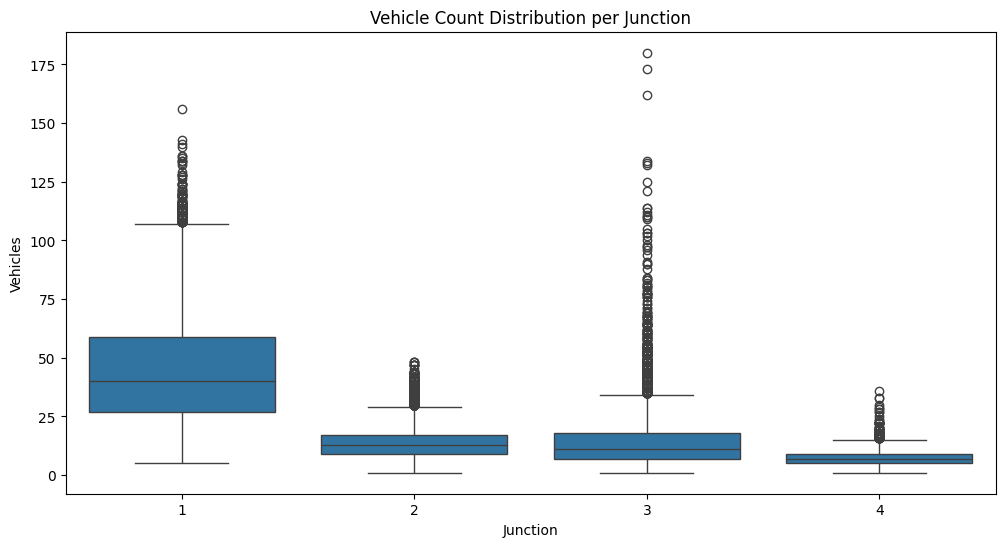

In [85]:
# Whats is the distribution of vehicles across junctions?

# Boxplot to compare vehicle counts across junctions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Junction', y='Vehicles', data=df_train)
plt.title('Vehicle Count Distribution per Junction')
plt.show()


**Observations:**

1. Junction 1 exhibits a higher median traffic pattern.

2. Junctions 2, 3, and 4 display lower median traffic patterns compared to Junction 1.

3. Junction 3 has extreme outliers, suggesting unusual traffic patterns.

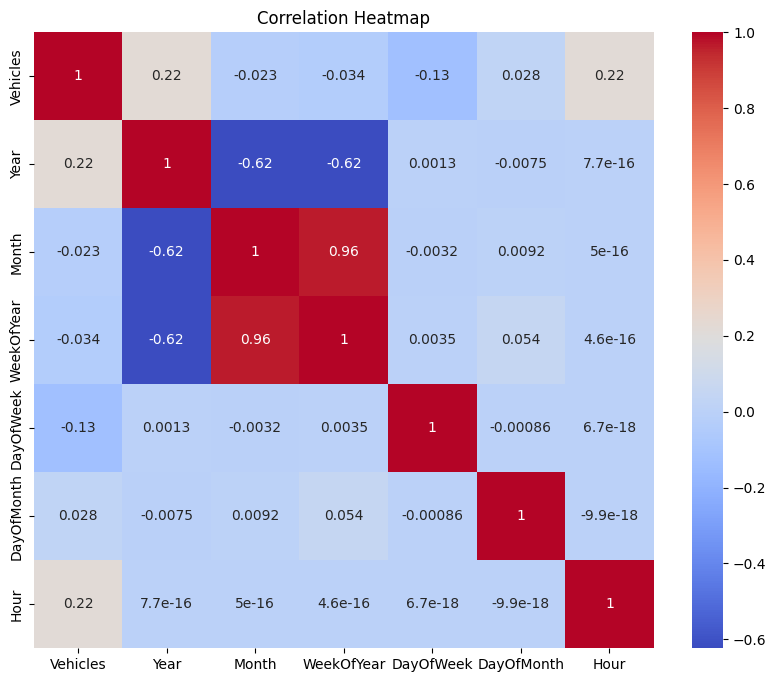

In [86]:
# What is correlation between the Vehicles and other columns?

# Correlation heatmap
correlation_cols = ['Vehicles', 'Year', 'Month', 'WeekOfYear', 'DayOfWeek', 'DayOfMonth', 'Hour']
correlation_data = df_train[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Observation:**

The heatmap indicates a high correlation between the number of vehicles and the hour of the day compared to other variables.

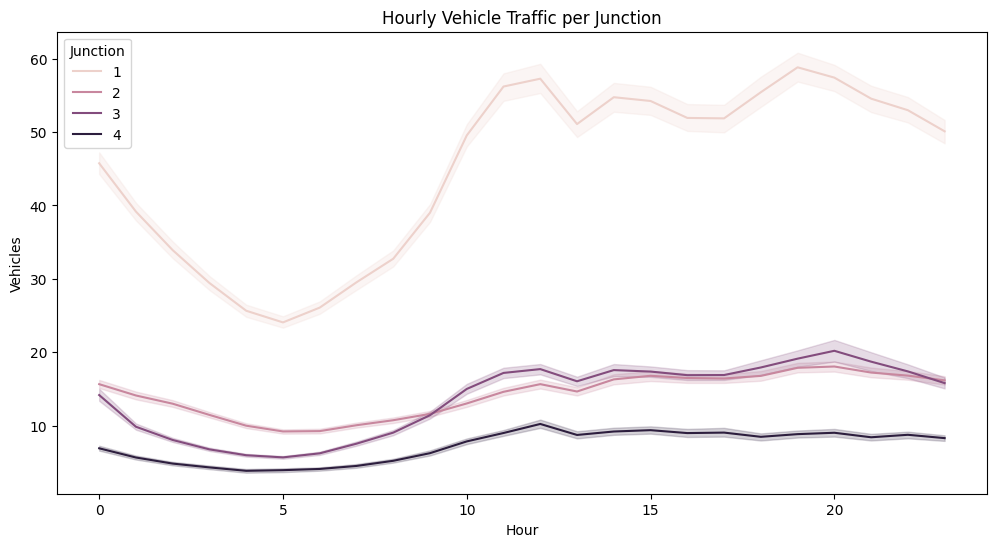

In [87]:
# What is the hourly traffic trend per junction?

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_train, x='Hour', y='Vehicles', hue='Junction')
plt.title('Hourly Vehicle Traffic per Junction')
plt.show()

**Observations:**

1. The above plot indicates that Junction 1 experiences a higher volume of traffic compared to other junctions at any hour of the day.

2. Typically, the hours between 10:00 and 23:00 show peak traffic across all junctions.

3. Additionally, there is a noticeable drop in traffic between 00:00 and 05:00, after which traffic volume begins to rise steadily throughout the rest of the day.

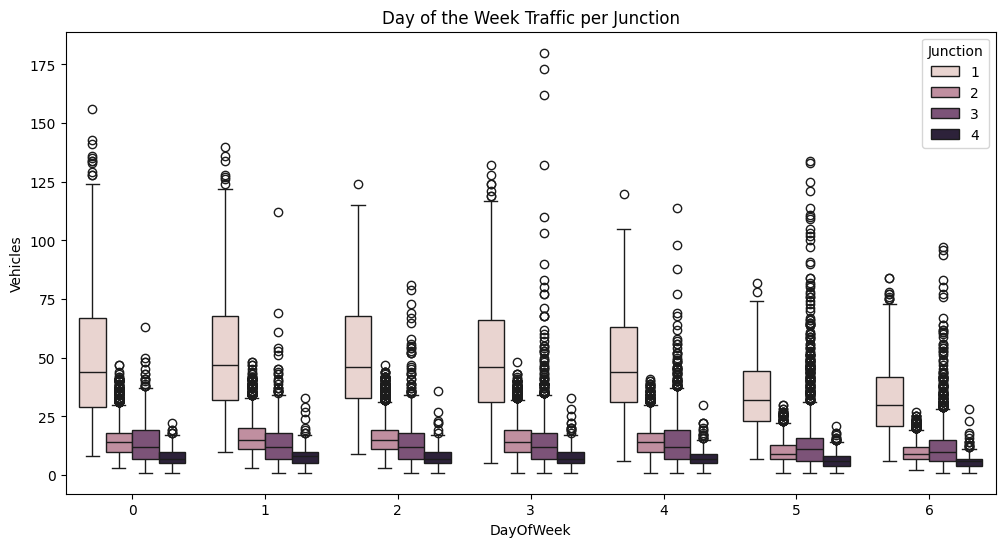

In [88]:
# What is the weekly traffic trend per junction?

plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='Vehicles', hue='Junction', data=df_train)
plt.title('Day of the Week Traffic per Junction')
plt.show()

**Observations:**

1. The above plot shows that all junctions experience a nearly equal volume of traffic from Day 0 to Day 4 (Monday to Friday).

2. Days 5 and 6 (Saturday and Sunday) exhibit significantly less traffic.

3. Furthermore, Junction 3 displays an unusual traffic pattern, marked by numerous outliers on any day of the week.


**Note**:

Junction 3 requires a different approach compared to Junctions 1, 2, and 4 when developing a forecasting model due to it's unusual traffic pattern

---

#### **Feature Selection**

---

**Dataset Split**

In [89]:
# Let's separate the data into two dataset based on Junction and build the model

# Junction data apart from Junction 3
df_train_junction = df_train[df_train['Junction'] != 3]

# Junction 3 data
df_train_junction3 = df_train[df_train['Junction'] == 3]

In [90]:
# Do we sufficient data for Junctions other than 3?
 
df_train_junction.shape

(33528, 10)

In [91]:
# Do we sufficient data for Junction 3?
 
df_train_junction3.shape

(14592, 10)

In [92]:
# Let's separate the data into two dataset based on Junction and build the model

# Junction data apart from Junction 3
df_test_junction = df_test[df_test['Junction'] != 3]

# Junction 3 data
df_test_junction3 = df_test[df_test['Junction'] == 3]

In [93]:
# Do we sufficient test data for Junctions other than 3?
 
df_test_junction.shape

(8856, 9)

In [94]:
# Do we sufficient test data for Junction 3?
 
df_test_junction3.shape

(2952, 9)

In [95]:
# Let's split the df_train_junction data into X and y

X = df_train_junction.drop(columns=['DateTime', 'Vehicles'])
y = df_train_junction['Vehicles']


In [96]:
# Let's use capping technique to handle outliers for Junction 3 data
# We will try with different upper and lower limits and see which one works best

Q1 = df_train_junction3['Vehicles'].quantile(0.25)
Q3 = df_train_junction3['Vehicles'].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.0 * IQR
lower_limit = Q1 - 1.0 * IQR

# upper_limit = Q3 + 1.5 * IQR
# lower_limit = Q1 - 1.5 * IQR

# upper_limit = Q3 + 2.0 * IQR
# lower_limit = Q1 - 2.0 * IQR

# Let's remove the entire row where Vehicles is greater than upper_limit or less than lower_limit

df_train_junction3 = df_train_junction3[(df_train_junction3['Vehicles'] > lower_limit) & (df_train_junction3['Vehicles'] < upper_limit)]

In [97]:
# Do we sufficient training data for Junction 3?
 
df_train_junction3.shape

(13666, 10)

In [98]:
# Let's split the df_train_junction3 data into X3 and y3

X3 = df_train_junction3.drop(columns=['DateTime', 'Vehicles'])
y3 = df_train_junction3['Vehicles']


**Feature Importance for Model without Junction 3 data**

In [99]:
# Feature Importance with Random Forest

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


      Feature  Importance
0    Junction    0.506285
1        Year    0.187184
6        Hour    0.142951
4   DayOfWeek    0.076336
2       Month    0.044667
3  WeekOfYear    0.031225
5  DayOfMonth    0.010335
7   IsHoliday    0.001017


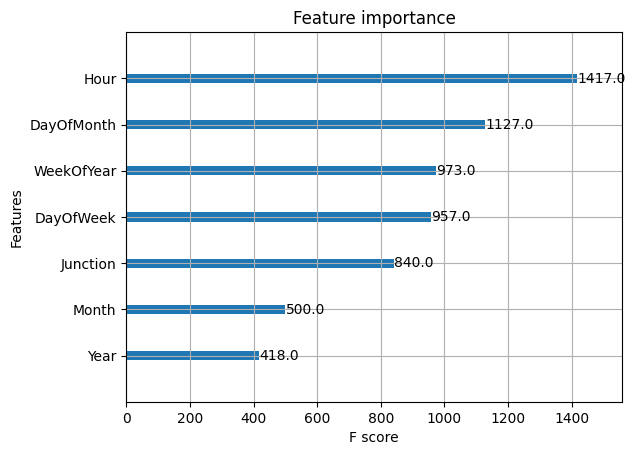

In [100]:
# Feature Importance with XGBoost

import xgboost as xgb
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X, y)

# Plot feature importance
xgb.plot_importance(model)
plt.show()


In [101]:
# Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE

model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

print("Selected Features:", X.columns[rfe.support_])


Selected Features: Index(['Junction', 'Year', 'Month', 'DayOfWeek', 'Hour'], dtype='object')


**Observation**:

Based on the above results for data excluding Junction 3, we should include all columns in the ML model since there is no clear indication of the most important features.

**Feature Importance for Model with Junction 3 data**

In [102]:
# Feature Importance with Random Forest

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X3, y3)

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X3.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


      Feature  Importance
6        Hour    0.385628
1        Year    0.209639
3  WeekOfYear    0.143641
5  DayOfMonth    0.133342
4   DayOfWeek    0.075928
2       Month    0.046383
7   IsHoliday    0.005438
0    Junction    0.000000


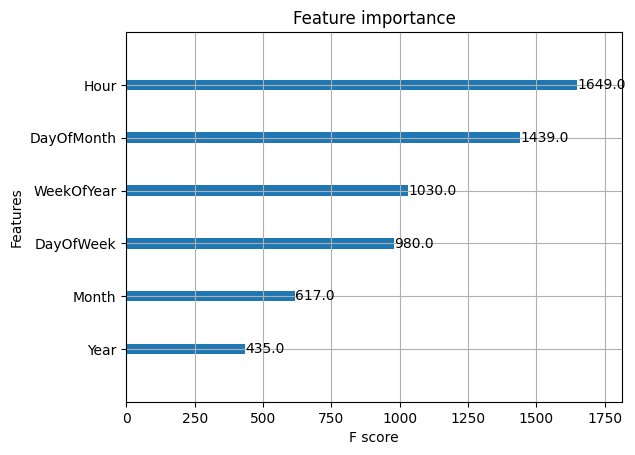

In [103]:
# Feature Importance with XGBoost

import xgboost as xgb
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X3, y3)

# Plot feature importance
xgb.plot_importance(model)
plt.show()


In [104]:
# Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE

model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X3, y3)

print("Selected Features:", X3.columns[rfe.support_])


Selected Features: Index(['Year', 'WeekOfYear', 'DayOfWeek', 'DayOfMonth', 'Hour'], dtype='object')


**Observation**:

Based on the results for Junction 3 data, we should include only the columns ['Year', 'WeekOfYear', 'DayOfWeek', 'DayOfMonth', 'Hour'] in the ML model, as these features were consistently highlighted in all of the feature importance analyses.

But we will still go ahead with all columns.

---

#### **Time Series Forecasting using XGBoost - For Junction 1,2 & 4**

---

In [105]:
# Let's split the df_train_junction data into X_train, X_val, y_train, y_val

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Hyperparameter Tuning**

In [39]:
# Grid Search with Cross-Validation

from sklearn.model_selection import GridSearchCV

model = XGBRegressor()

param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.025, 0.05, 0.1],
    'max_depth': [9, 12, 15],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0, 1.2],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 400, 'subsample': 0.6}


In [40]:
# Randomized Search with Cross-Validation

from sklearn.model_selection import RandomizedSearchCV

model = XGBRegressor()

param_dist = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.03, 0.05, 0.07],
    'max_depth': [6, 9, 12],
    'subsample': [0.4, 0.6, 0.8],
    'colsample_bytree': [0.8, 1.0, 1.2]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
print(random_search.best_params_)

{'subsample': 0.8, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.07, 'colsample_bytree': 1.0}


In [106]:
best_params = {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 300, 'subsample': 0.6}

**Model Training and Prediction**

In [107]:
# Let's use XGBoost model to train and predict the vehicles 

model = XGBRegressor(**best_params)
model.fit(X_train, y_train)

# Predict the vehicles
y_pred = model.predict(X_val)

**Model Evaluation**

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Mean Absolute Error (MAE): 2.1027990419616494
Mean Squared Error (MSE): 7.944199136847554
Root Mean Squared Error (RMSE): 2.8185455711851732
R² Score: 0.9847967624664307


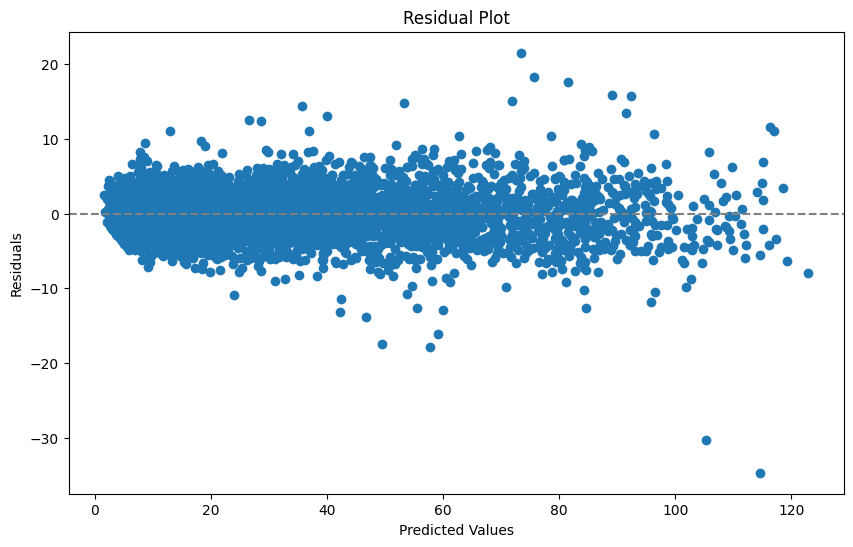

In [109]:
# Residual Plot (Difference between Actual and Predicted)

residuals = y_val - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


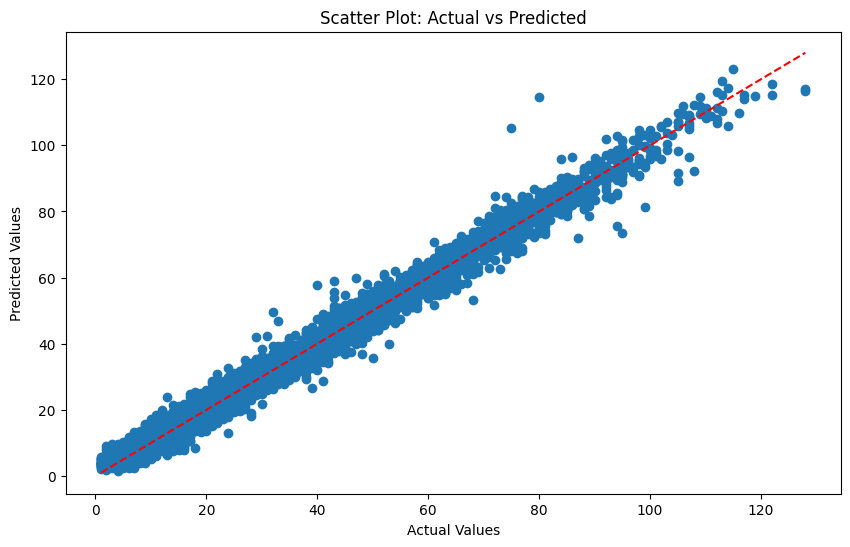

In [110]:
# Actual vs Predicted Plot

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Ideal line
plt.title('Scatter Plot: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


**Interpretation of Metrics and Plots:**

1. **MAE/MSE/RMSE:** Lower values indicate better model performance.

2. **R² Score:** Closer to 1 means a better fit, indicates the model is capturing the variance in the data well.

3. **Residual Plot:** Random scatter around 0 indicates a good fit. 

4. **Actual vs Predicted Plot:** Model shows predicted values are close to actual values.

**Final Predictions on Test Data**

In [111]:
df_test_junction

,DateTime,Junction,Year,Month,WeekOfYear,DayOfWeek,DayOfMonth,Hour,IsHoliday
0,2017-07-01 00:00:00,1,2017,7,26,5,1,0,0
1,2017-07-01 01:00:00,1,2017,7,26,5,1,1,0
2,2017-07-01 02:00:00,1,2017,7,26,5,1,2,0
3,2017-07-01 03:00:00,1,2017,7,26,5,1,3,0
4,2017-07-01 04:00:00,1,2017,7,26,5,1,4,0
...,...,...,...,...,...,...,...,...,...
11803,2017-10-31 19:00:00,4,2017,10,44,1,31,19,0
11804,2017-10-31 20:00:00,4,2017,10,44,1,31,20,0
11805,2017-10-31 21:00:00,4,2017,10,44,1,31,21,0
11806,2017-10-31 22:00:00,4,2017,10,44,1,31,22,0


In [112]:
# Predict the vehicles on test data

df_test_junction.drop(columns=['DateTime'], inplace=True)

df_test_junction_pred = model.predict(df_test_junction)

In [113]:
df_test_junction_pred

array([63.51076 , 54.37624 , 33.29074 , ..., 15.107165, 13.127258,
       13.952611], dtype=float32)

In [114]:
# Let's round-off and merge the predicted vehicles with test data

df_test_junction['Vehicles'] = df_test_junction_pred.astype(int)
df_test_junction

,Junction,Year,Month,WeekOfYear,DayOfWeek,DayOfMonth,Hour,IsHoliday,Vehicles
0,1,2017,7,26,5,1,0,0,63
1,1,2017,7,26,5,1,1,0,54
2,1,2017,7,26,5,1,2,0,33
3,1,2017,7,26,5,1,3,0,26
4,1,2017,7,26,5,1,4,0,22
...,...,...,...,...,...,...,...,...,...
11803,4,2017,10,44,1,31,19,0,15
11804,4,2017,10,44,1,31,20,0,21
11805,4,2017,10,44,1,31,21,0,15
11806,4,2017,10,44,1,31,22,0,13


---

#### **Time Series Forecasting using XGBoost - For Junction 3**

---

In [115]:
# Let's split the df_train_junction3 data into X_train, X_val, y_train, y_val

from sklearn.model_selection import train_test_split

X_train3, X_val3, y_train3, y_val3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

**Hyperparameter Tuning**

In [51]:
# Grid Search with Cross-Validation

from sklearn.model_selection import GridSearchCV

model3 = XGBRegressor()

param_grid3 = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.01, 0.025, 0.05],
    'max_depth': [6, 9, 12],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search3 = GridSearchCV(estimator=model3, param_grid=param_grid3, cv=5, scoring='neg_mean_squared_error')
grid_search3.fit(X_train3, y_train3)

print(grid_search3.best_params_)


{'colsample_bytree': 1.0, 'learning_rate': 0.025, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.6}


In [52]:
# Randomized Search with Cross-Validation

from sklearn.model_selection import RandomizedSearchCV

# Define the model
model3 = XGBRegressor()

# Define the parameter distribution
param_dist3 = {
    'n_estimators': [400, 500, 600],
    'learning_rate': [0.02, 0.025, 0.03],
    'max_depth': [6, 9, 12],
    'subsample': [0.3, 0.4, 0.5, 0.6],
    'colsample_bytree': [0.6, 0.8, 1.0, 1.2]
}

# Randomized search with cross-validation
random_search3 = RandomizedSearchCV(estimator=model3, param_distributions=param_dist3, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search3.fit(X_train3, y_train3)

# Best parameters
print(random_search3.best_params_)

{'subsample': 0.6, 'n_estimators': 600, 'max_depth': 9, 'learning_rate': 0.025, 'colsample_bytree': 1.0}


In [116]:
# Choosing the best parameters

best_params3 = {'colsample_bytree': 1.0, 'learning_rate': 0.025, 'max_depth': 9, 'n_estimators': 600, 'subsample': 0.6}

**Model Training and Prediction**

In [117]:
# Let's use XGBoost model to train and predict the vehicles 

model3 = XGBRegressor(**best_params3)
model3.fit(X_train3, y_train3)

# Predict the vehicles
y_pred3 = model3.predict(X_val3)

**Model Evaluation**

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_val3, y_pred3)
mse = mean_squared_error(y_val3, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(y_val3, y_pred3)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 1.98319372519491
Mean Squared Error (MSE): 6.546772546495679
Root Mean Squared Error (RMSE): 2.558666165504144
R² Score: 0.8368423581123352


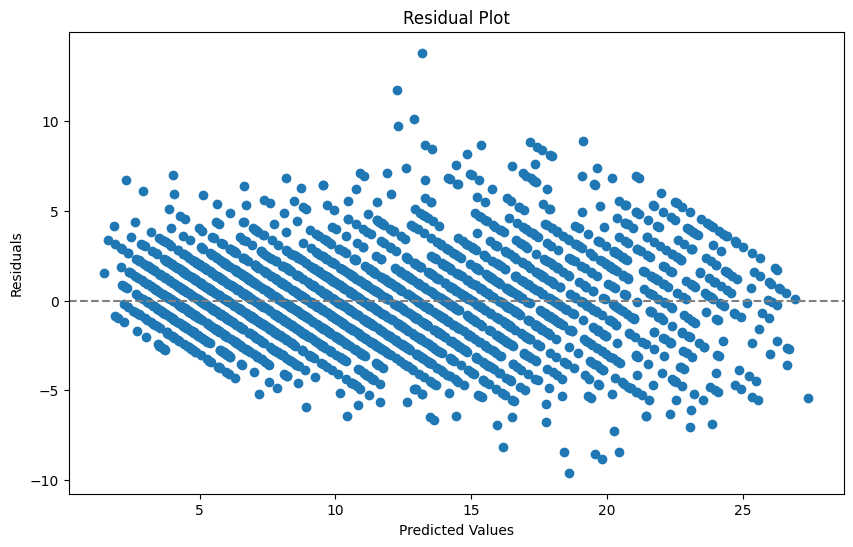

In [119]:
# Residual Plot (Difference between Actual and Predicted)

residuals = y_val3 - y_pred3

plt.figure(figsize=(10, 6))
plt.scatter(y_pred3, residuals)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


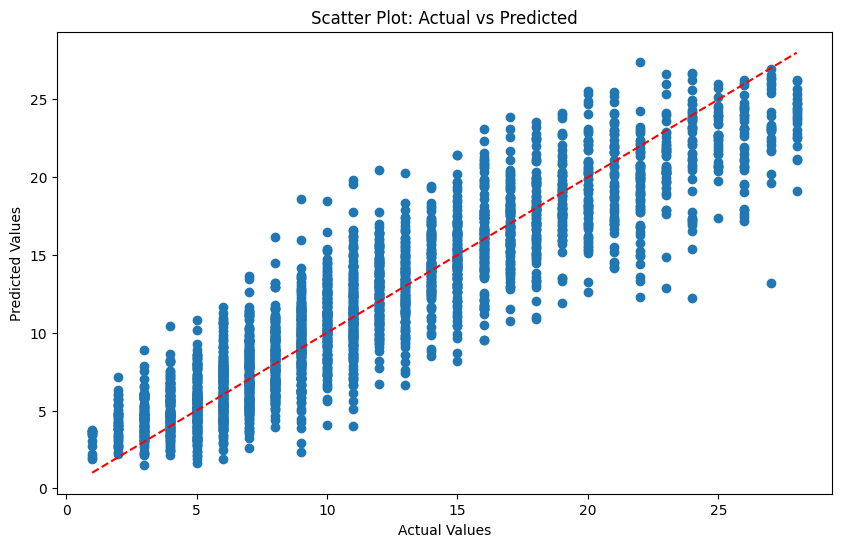

In [120]:
# Actual vs Predicted Plot

plt.figure(figsize=(10, 6))
plt.scatter(y_val3, y_pred3)
plt.plot([min(y_val3), max(y_val3)], [min(y_val3), max(y_val3)], color='red', linestyle='--')  # Ideal line
plt.title('Scatter Plot: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


**Interpretation of Metrics and Plots**:

1. **MAE/MSE/RMSE:** Observed values indicate moderately good model performance.

2. **R² Score:** Closer to 1 means a better fit, indicates the model is capturing the variance in the data well.

3. **Residual Plot:** Random scatter around 0 indicates a good fit with few outliers visible.

4. **Actual vs Predicted Plot:** Model shows predicted values are close to actual values. There are few outliers also visible.

**Final Prediction in Test Data**

In [121]:
df_test_junction3

,DateTime,Junction,Year,Month,WeekOfYear,DayOfWeek,DayOfMonth,Hour,IsHoliday
5904,2017-07-01 00:00:00,3,2017,7,26,5,1,0,0
5905,2017-07-01 01:00:00,3,2017,7,26,5,1,1,0
5906,2017-07-01 02:00:00,3,2017,7,26,5,1,2,0
5907,2017-07-01 03:00:00,3,2017,7,26,5,1,3,0
5908,2017-07-01 04:00:00,3,2017,7,26,5,1,4,0
...,...,...,...,...,...,...,...,...,...
8851,2017-10-31 19:00:00,3,2017,10,44,1,31,19,0
8852,2017-10-31 20:00:00,3,2017,10,44,1,31,20,0
8853,2017-10-31 21:00:00,3,2017,10,44,1,31,21,0
8854,2017-10-31 22:00:00,3,2017,10,44,1,31,22,0


In [123]:
# Predict the vehicles on test data

df_test_junction3.drop(columns=['DateTime'], inplace=True)

df_test_junction3_pred = model3.predict(df_test_junction3)

In [124]:
df_test_junction3_pred

array([16.235691, 11.283244, 11.127127, ..., 23.014164, 21.469786,
       19.021412], dtype=float32)

In [125]:
# Let's round-off and merge the predicted vehicles with test data

df_test_junction3['Vehicles'] = df_test_junction3_pred.astype(int)
df_test_junction3

,Junction,Year,Month,WeekOfYear,DayOfWeek,DayOfMonth,Hour,IsHoliday,Vehicles
5904,3,2017,7,26,5,1,0,0,16
5905,3,2017,7,26,5,1,1,0,11
5906,3,2017,7,26,5,1,2,0,11
5907,3,2017,7,26,5,1,3,0,8
5908,3,2017,7,26,5,1,4,0,7
...,...,...,...,...,...,...,...,...,...
8851,3,2017,10,44,1,31,19,0,24
8852,3,2017,10,44,1,31,20,0,23
8853,3,2017,10,44,1,31,21,0,23
8854,3,2017,10,44,1,31,22,0,21


---

#### **Conclusion**

---

The XGBoost model appears to be a strong fit given its impressive results for all the given Junctions.
 
However, exploring other timeseries models like SARIMAX or Prophet is always a good idea, as they might yield even better outcomes.

---